In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

from dbgsom.dbgsom_ import DBGSOM

In [2]:
data = pd.read_csv(
    "F:\Dokumente\git\data\CIC-IDS2017\MachineLearningCSV\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
).dropna()

In [3]:
X = data.drop(columns=" Label")
X.replace([np.inf, -np.inf], 0, inplace=True)
y = data[" Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)

In [17]:
scaler = StandardScaler()
ohe = OneHotEncoder()
som = DBGSOM(
    max_epochs=300,
    spreading_factor=0.1,
    max_neurons=300,
    vertical_growth=True,
    # threshold_method="se",
    growth_criterion="entropy",
    min_samples_vertical_growth=50,
)

pipe = Pipeline(
    steps=[
        ("scaler", scaler),
        ("som", som),
    ]
)

In [18]:
pipe.fit(X_train, y_train)

 51%|█████     | 153/300 [00:02<00:02, 56.47 epochs/s]


Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 DBGSOM(growth_criterion='entropy', max_epochs=300,
                        max_neurons=300, min_samples_vertical_growth=50,
                        spreading_factor=0.1, vertical_growth=True))])

In [19]:
som.topographic_error_

0.15138659507353688

In [20]:
pipe.score(X_test, y_test)

0.99373048113274

In [27]:
f1_score(
    y_test,
    pipe.predict(X_test),
    average="macro",
    # average=None
)

0.47916952921115347

c:\tools\miniconda3\envs\py39_dbgsom\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


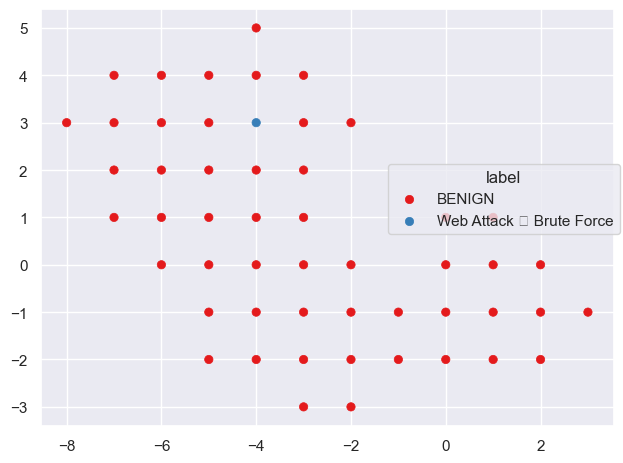

In [22]:
som.plot(color="label", palette="Set1")

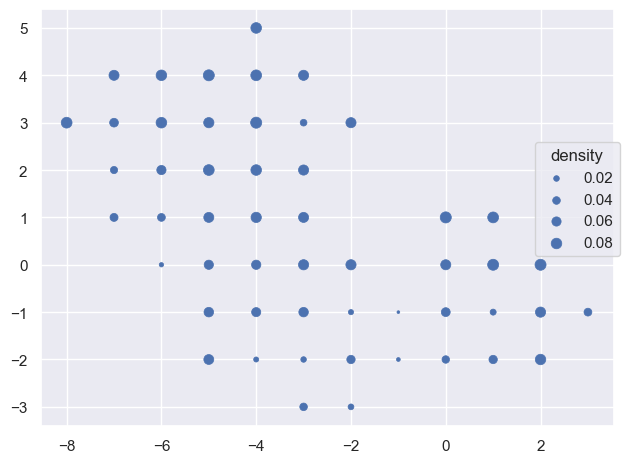

In [29]:
som.plot(pointsize="density", palette="viridis")

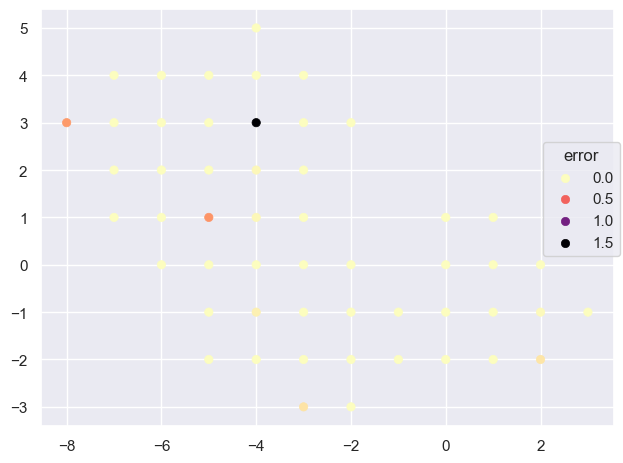

In [24]:
som.plot(color="error")

In [25]:
len(som.neurons_)

52

In [26]:
np.unique(y, return_counts=True)

(array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � Sql Injection',
        'Web Attack � XSS'], dtype=object),
 array([168166,   1507,     21,    652], dtype=int64))